In [183]:
from generate_paths import get_all_files
from get_features import get_features
import cPickle as pickle
import numpy as np
import copy

In [2]:
from progressbar import ProgressBar

In [3]:
import matplotlib.pyplot as plt
import prettyplotlib as ppl
%matplotlib inline

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

In [184]:
files = get_all_files()[:1000]

In [5]:
features = pickle.load(open('features/'+'features'+'.pkl', 'rbhg

In [185]:
feat_name = 'segments_pitches'
for i,f in ProgressBar()(enumerate(files)):
    features[i][feat_name] = get_features(f, feat_name)[feat_name]

| 999 Elapsed Time: 0:00:43                                          


469.84999999999991

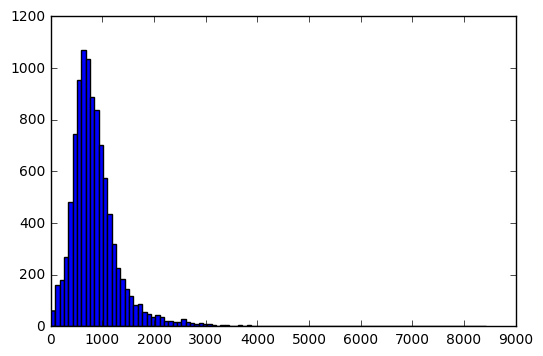

In [187]:
feat_lengths = np.array([feat[feat_name].shape[0] for feat in features])
plt.hist(feat_lengths, 100);
np.percentile(timbre_lengths, 15)

In [84]:
pickle.dump(features, open('features/'+'features'+'.pkl', 'wb'))

469.84999999999991

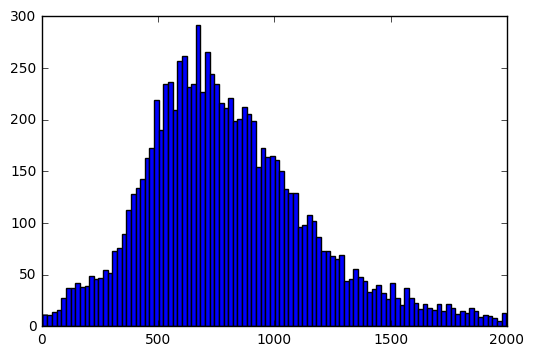

In [6]:
timbre_lengths = np.array([feat['segments_timbre'].shape[0] for feat in features])
plt.hist(timbre_lengths[timbre_lengths<2000], 100);
np.percentile(timbre_lengths, 15)

In [9]:
np.var(features[5]['segments_timbre'], axis=0)

array([   46.55823322,  3055.43984999,  1550.55832723,   745.75486427,
        1264.25054464,   348.34881303,   399.30400554,   293.97182894,
         476.63321264,   223.7451418 ,   123.08129772,   299.75623561])

In [151]:
filter_data = filter(lambda x: x['year'] > 1000 and x['segments_timbre'].shape[0] > 400, features)
len(filter_data)

4256

In [152]:
feat_name = 'segments_timbre'

In [165]:
labels = np.array(map(lambda x: x['year']-1960, filter_data))
mean_features = np.array(map(lambda x: np.mean(x[feat_name], axis=0), filter_data))
var_features = np.array(map(lambda x: np.var(x[feat_name], axis=0), filter_data))
mean_var_features = np.array([np.concatenate([m, v]) for m,v in zip(mean_features, var_features)])

In [166]:
curr_feat = np.array(map(lambda x: np.ravel(x[feat_name][:400]), filter_data))

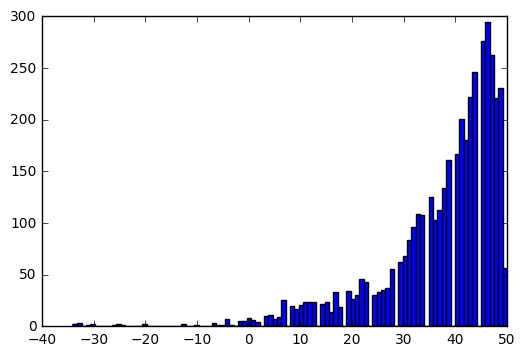

In [167]:
plt.hist(labels, 100);

In [170]:
clf = Ridge(alpha=1.0)
mean_var_scores = cross_val_score(clf, curr_feat, labels, cv=5, scoring='neg_mean_absolute_error')

In [171]:
mean_var_scores

array([-19.04904368, -18.65982327, -20.00259809, -18.29264591, -19.35581804])

In [182]:
clf = Ridge(alpha=10.0)
train_rng = 3800
#clf.fit(curr_feat[:train_rng], labels[:train_rng])
#prediction = clf.predict(curr_feat[train_rng:])
prediction = [35 for _ in prediction]
deviation = prediction-labels[train_rng:]
np.sqrt(np.mean((deviation)**2))

11.552986247203368

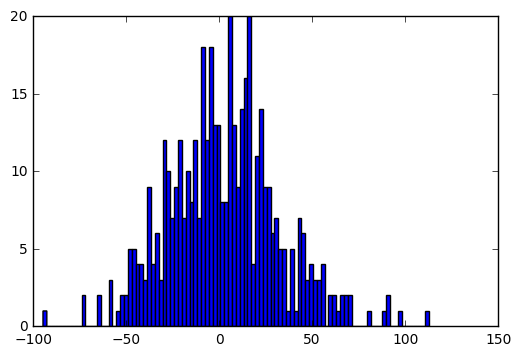

In [173]:
plt.hist(deviation, 100);

In [156]:
[f.shape for f in curr_feat]

[(4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),
 (4800,),


In [193]:
isinstance(features[0]['segments_pitches'], np.ndarray)

True